In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df_1 = pd.read_csv('input.csv',encoding='ISO-8859-1')
df_2 = pd.read_csv('input_2.csv',encoding='ISO-8859-1')
dataframes = [df_1,df_2]
df = pd.concat(dataframes)
display(df)

,text,type
0,DB Backups &nbsp;What project is affected?: he...,database
1,mysql is stuck on production HiSeems like MySQ...,database
2,Database and Media Folder Migration On Staging...,database
3,[HH] MySQL server has gone away errors in log...,database
4,2 or more locations failed on 'Multitenant Gra...,database
...,...,...
11561,[E5 Fashion] increase the Staging (Dedicated) ...,upsize
11562,CVS download works only when cache is cleaned ...,deploy
11563,Can we enable Fastly http3 quic support? Hello...,fastly
11564,"Deployments fail again Hello Paul,I was going ...",deploy


In [3]:
df.isnull().values.any()

False

In [4]:
df1 = df
df1.iloc[0][0]

'DB Backups &nbsp;What project is affected?: hetumjt6v5buc&nbsp;What environment(s) are affected?: ProductionStaging Environment name (if staging is not selected leave empty):&nbsp; -&nbsp;What is the issue or change request?: &nbsp;&nbsp;DB Backup Required by merchant for below dates. 1 22nd October or closest before 23rd&nbsp;2 25th October or after 23rd&nbsp;3 End of September&nbsp; &nbsp;(Issues) How do we replicate/observe the issue?: &nbsp;NA&nbsp;(Change Requests) Why are we making this change?: Customer Request&nbsp;What has already been done to troubleshoot or to validate this request?: &nbsp;NA&nbsp;Is the production site live?: Yes&nbsp;,DB Backups Data Access Consent has not been granted for this case. Please make sure to have the Primary MC Contact grant explicit permission on this case should you need to access the client\'s data via ssh/ftp/api or through any admin panel as well as when backups are needed from on-prem customers.,DB Backups Hi Nikhil,  This is the last on

In [5]:
import re

df1['text'] = df1['text'].apply(lambda x: re.sub(r'\b(?:\S*?\.(?:com|net|org|xml|php|html))\b',' ',x))
df1['text'] = df1['text'].apply(lambda x: re.sub(r'\[YYYY-MM-DDTHH:MM:SSZ\]', ' ',x))
df1['text'] = df1['text'].apply(lambda x: re.sub(r'\[\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}Z\]', ' ',x))

In [6]:
df1.iloc[0][0]

'DB Backups &nbsp;What project is affected?: hetumjt6v5buc&nbsp;What environment(s) are affected?: ProductionStaging Environment name (if staging is not selected leave empty):&nbsp; -&nbsp;What is the issue or change request?: &nbsp;&nbsp;DB Backup Required by merchant for below dates. 1 22nd October or closest before 23rd&nbsp;2 25th October or after 23rd&nbsp;3 End of September&nbsp; &nbsp;(Issues) How do we replicate/observe the issue?: &nbsp;NA&nbsp;(Change Requests) Why are we making this change?: Customer Request&nbsp;What has already been done to troubleshoot or to validate this request?: &nbsp;NA&nbsp;Is the production site live?: Yes&nbsp;,DB Backups Data Access Consent has not been granted for this case. Please make sure to have the Primary MC Contact grant explicit permission on this case should you need to access the client\'s data via ssh/ftp/api or through any admin panel as well as when backups are needed from on-prem customers.,DB Backups Hi Nikhil,  This is the last on

In [7]:
df1['text'] = df1['text'].apply(lambda x: re.sub(r'https://\S+', ' ', x))

In [8]:
df1.iloc[0][0]

'DB Backups &nbsp;What project is affected?: hetumjt6v5buc&nbsp;What environment(s) are affected?: ProductionStaging Environment name (if staging is not selected leave empty):&nbsp; -&nbsp;What is the issue or change request?: &nbsp;&nbsp;DB Backup Required by merchant for below dates. 1 22nd October or closest before 23rd&nbsp;2 25th October or after 23rd&nbsp;3 End of September&nbsp; &nbsp;(Issues) How do we replicate/observe the issue?: &nbsp;NA&nbsp;(Change Requests) Why are we making this change?: Customer Request&nbsp;What has already been done to troubleshoot or to validate this request?: &nbsp;NA&nbsp;Is the production site live?: Yes&nbsp;,DB Backups Data Access Consent has not been granted for this case. Please make sure to have the Primary MC Contact grant explicit permission on this case should you need to access the client\'s data via ssh/ftp/api or through any admin panel as well as when backups are needed from on-prem customers.,DB Backups Hi Nikhil,  This is the last on

In [9]:
# Assuming text_data is a pandas DataFrame column
df1['text'] = df1['text'].apply(lambda x: re.sub(r'[^\x21-\x7E]', ' ', x))
df1['text'] = df1['text'].apply(lambda x: re.sub(r'\\\\', ' ', x))
df1['text']= df1['text'].apply(lambda x: re.sub(r'zzz', ' ', x))

In [10]:
df1['text'] = df1['text'].apply(lambda x: re.sub(r'&nbsp;', ' ',x))
df1['text'] = df1['text'].str.replace('\?:',' ')
df1['text'] = df1['text'].str.replace(':',' ')
df1['text'] = df1['text'].str.replace(';',' ')
df1['text'] = df1['text'].str.replace('//',' ')
df1['text'] = df1['text'].apply(lambda x: re.sub(r'[^[:alnum:]]', ' ',x))
df1['text'] = df1['text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]', ' ',x))

/var/folders/08/2mb1bfy1535cf1c7f52srq2m0000gn/T/ipykernel_4283/2569950717.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['text'] = df1['text'].str.replace('\?:',' ')


In [11]:
df1['text'] = df1['text'].apply(lambda x: re.sub(r'http[[:alnum:]]*',' ',x))

/var/folders/08/2mb1bfy1535cf1c7f52srq2m0000gn/T/ipykernel_4283/3997793962.py:1: FutureWarning: Possible nested set at position 5
  df1['text'] = df1['text'].apply(lambda x: re.sub(r'http[[:alnum:]]*',' ',x))


In [12]:
#adding space between lower and upper case words
df1['text'] = df1['text'].apply(lambda x: re.sub(r'([a-z])([A-Z])', r'\1 \2', x))

In [13]:
df1.iloc[0][0]

'DB Backups  What project is affected  hetumjt6v5buc What environment s  are affected  Production Staging Environment name  if staging is not selected leave empty      What is the issue or change request    DB Backup Required by merchant for below dates  1 22nd October or closest before 23rd 2 25th October or after 23rd 3 End of September    Issues  How do we replicate observe the issue   NA  Change Requests  Why are we making this change  Customer Request What has already been done to troubleshoot or to validate this request   NA Is the production site live  Yes  DB Backups Data Access Consent has not been granted for this case  Please make sure to have the Primary MC Contact grant explicit permission on this case should you need to access the client s data via ssh ftp api or through any admin panel as well as when backups are needed from on prem customers  DB Backups Hi Nikhil   This is the last one   Please provide one more from anytime in August 2023  Regards   Maxim DB Backups Hel

In [14]:
df1['text'] = df1['text'].str.lower()

In [15]:
df1['text'] = df1['text'].apply(lambda x: re.sub(r'\s+', ' ',x))

In [16]:
def remove_alphanumeric_words(text):
    return ' '.join(word for word in text.split() if not any(char.isdigit() for char in word))

In [17]:
df1['text'] = df1['text'].apply(remove_alphanumeric_words)

In [18]:
df1.iloc[0][0]

'db backups what project is affected what environment s are affected production staging environment name if staging is not selected leave empty what is the issue or change request db backup required by merchant for below dates october or closest before october or after end of september issues how do we replicate observe the issue na change requests why are we making this change customer request what has already been done to troubleshoot or to validate this request na is the production site live yes db backups data access consent has not been granted for this case please make sure to have the primary mc contact grant explicit permission on this case should you need to access the client s data via ssh ftp api or through any admin panel as well as when backups are needed from on prem customers db backups hi nikhil this is the last one please provide one more from anytime in august regards maxim db backups hello your support request has now been closed if you are still in need of support f

In [19]:
df2 = df1

In [20]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/swap7898/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/swap7898/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/swap7898/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
stop_words = stopwords.words('english')
df2['text'] = df2['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [22]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [23]:
import spacy
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

In [24]:
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    return lemmatized_text

In [25]:
df2['text'] = df2['text'].apply(lemmatize_text)

In [26]:
df2.iloc[0][0]

'db backups project affect environment affect production staging environment name staging select leave empty issue change request db backup require merchant date october close october end september issue replicate observe issue na change request make change customer request already do troubleshoot validate request na production site live yes db backups datum access consent grant case please make sure primary mc contact grant explicit permission case need access client datum via ssh ftp api admin panel well backup need prem customer db backups hi nikhil last one please provide one anytime august regard maxim db backups hello support request close still need support issue please create follow support request directly one reopen investigation issue right away may receive email customer support experience survey link adobe commit provide good class customer support experience would greatly appreciate feedback help we improve thank adobe commerce customer engineering team documentation help

In [27]:
df_t = df2

In [28]:
df_t

,text,type
0,db backups project affect environment affect p...,database
1,mysql stick production hi seem like sql stuck ...,database
2,database medium folder migration stage able re...,database
3,h sql server go away error log hello addition ...,database
4,location fail multitenant graph ql tmobile san...,database
...,...,...
11561,fashion increase stage dedicated cluster order...,upsize
11562,cvs download work cache clean deployment produ...,deploy
11563,enable fastly quic support hello look like pro...,fastly
11564,deployment fail hello paul go backlog notice r...,deploy


In [29]:
def replace_words(text):
    # Define replacement mappings
    replacement_mappings = {
    'database': ['db', 'databases', 'snapshot', 'tmp', 'wsrep', 'innodb', 'tmpdir', 'grep'],
    'mail': ['email', 'gmail', 'mail'],
    'upsize': ['upsized', 'upscale'],
    'deploy': ['deploy', 'deployment', 'deployments'],
    'sendgrid': ['sendgrid', 'grid', 'sg', 'spf', 'dkim', 'txt', 'bounced', 'dmarc', 'inbox', 'sasl', 'bounce', 'overwatch', 'smtp', 'credit', 'reputation', 'transactional', 'outbound', 'cname'],
    'sql': ['sql', 'mysql'],
    'elastic': ['elasticsearch', 'elastic', 'opensearch', 'xms', 'xmx', 'heap', 'cluster', 'health', 'pretty', 'yellow', 'green', 'red', 'analyzer', 'stopword', 'synonym', 'index', 'reindex', 'stopword', 'jvm', 'gc', 'shard', 'indices', 'agg', 'aggregation', 'replica', 'node', 'fielddata', 'durability', 'oversharding', 'elasticsuit'],
    'fastly': ['varnish', 'cdn', 'vcl', 'cdn', 'waf'],
    'redis': ['evict', 'eviction', 'evicted', 'hget', 'redissession', 'flush', 'flushall', 'maxmemory', 'credis', 'sentinel', 'sigterm', 'rss', 'rss', 'frag', 'fragmentation', 'replication', 'defrag', 'lazyfree', 'purge', 'dev', 'shm']
}

     # Iterate over each replacement mapping and replace all occurrences of the words
    for replacement_word, words_to_replace in replacement_mappings.items():
        for word_to_replace in words_to_replace:
            # Replace the words with the replacement word in the text
            text = text.replace(word_to_replace, replacement_word)
    
    return text

In [30]:
df_t['text'] = df_t['text'].apply(replace_words)

In [31]:
df_t

,text,type
0,database backups project affect environment af...,database
1,sql stick production hi seem like sql stuck pr...,database
2,database medium folder migration stage able re...,database
3,h sql server go away error log hello addition ...,database
4,location fail multitenant graph ql tmobile san...,database
...,...,...
11561,fashion increase stage dedicated elastic order...,upsize
11562,cvs download work cache clean deploy productio...,deploy
11563,enable fastly quic support hello look like pro...,fastly
11564,deploy fail hello paul go backlog notice respo...,deploy


In [32]:
def tokenize_text(text):
    # Tokenize the text using NLTK's word_tokenize
    tokens = word_tokenize(text)
    return tokens

In [33]:
df_t['text'] = df_t['text'].apply(tokenize_text)

In [34]:
df_filtered = df_t

In [35]:
def filter_words(tokens):
    filtered_tokens = [token for token in tokens if len(token) > 1]  # Remove single-character words
    filtered_tokens = [token for token in filtered_tokens if not token.isdigit()]  # Remove single-digit words
    return filtered_tokens

In [36]:
df_filtered['text'] = df_filtered['text'].apply(filter_words)

In [37]:
df_filtered

,text,type
0,"[database, backups, project, affect, environme...",database
1,"[sql, stick, production, hi, seem, like, sql, ...",database
2,"[database, medium, folder, migration, stage, a...",database
3,"[sql, server, go, away, error, log, hello, add...",database
4,"[location, fail, multitenant, graph, ql, tmobi...",database
...,...,...
11561,"[fashion, increase, stage, dedicated, elastic,...",upsize
11562,"[cvs, download, work, cache, clean, deploy, pr...",deploy
11563,"[enable, fastly, quic, support, hello, look, l...",fastly
11564,"[deploy, fail, hello, paul, go, backlog, notic...",deploy


In [38]:
from collections import Counter

In [39]:

# Flatten the list of tokenized text into a single list of words
all_words = [word for sublist in df_filtered['text'] for word in sublist]

# Count the frequency of each word using Counter
word_freq = Counter(all_words)

# Convert the word frequency Counter object to a DataFrame for easy manipulation
word_freq_df = pd.DataFrame.from_dict(word_freq, orient='index', columns=['frequency'])

# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

# Optionally, you can reset the index to have the words as a column
word_freq_df.reset_index(inplace=True)
word_freq_df.rename(columns={'index': 'word'}, inplace=True)

# Now word_freq_df contains the frequency of each word in your tokenized text


In [40]:
word_freq_df

,word,frequency
0,issue,208957
1,request,200487
2,support,190891
3,elastic,156995
4,adobe,148434
...,...,...
67031,eventstable,1
67032,evrea,1
67033,errman,1
67034,preservation,1


In [41]:
word_freq_df = word_freq_df[word_freq_df['frequency'] != 1]

In [42]:
word_freq_df

,word,frequency
0,issue,208957
1,request,200487
2,support,190891
3,elastic,156995
4,adobe,148434
...,...,...
40110,awbm,2
40111,moretto,2
40112,dominika,2
40113,rockland,2


In [43]:
df_word = pd.read_excel('Wordcount_1.xlsx')

In [44]:
df_word

,Word,Num of Docs
0,aam,1
1,abide,1
2,ablate,1
3,abler,1
4,above,1
...,...,...
2679,zenith,1
2680,zeta,1
2681,zipping,1
2682,zoa,1


In [45]:
one_time_words = set(df_word['Word'])

In [46]:
word_freq_df = word_freq_df[~word_freq_df['word'].isin(one_time_words)]

In [47]:
word_freq_df

,word,frequency
0,issue,208957
1,request,200487
2,support,190891
3,elastic,156995
4,adobe,148434
...,...,...
40110,awbm,2
40111,moretto,2
40112,dominika,2
40113,rockland,2


In [48]:
df_d = word_freq_df

In [49]:
import nltk
nltk.download('words')
from nltk.corpus import words

[nltk_data] Downloading package words to /Users/swap7898/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [50]:
def remove_non_dictionary_words(df, column_name):
    
    # Copy the original DataFrame to avoid modifying the original data
    cleaned_df = df.copy()
    removed_df = df.copy()
       # Get a set of valid English words from NLTK corpus
    english_words = set(words.words())

    # Define a function to filter non-dictionary words
    def filter_words(word):
        return word.lower() in english_words
    
    # Add custom words to the dictionary
    custom_words = {'magento', 'redis', 'mysql', 'database', 'elasticsearch', 'upsize','db','app','opensearch',
                   'sql','troubleshoot','mariadb','fastly','sendgrid','marketo','workfront','comp','dps','dc','dng',
                   'opentype','encoder','xd','optimizer','libraries','podcast','zookeeper','vcl','cdn',
                   'fastlycdn','waf','gb','mnt','sg','spf','dkim','smpt','cname','txt','dmarc','hget',
                   'credis','rss','frag','rabbitmq','es','os'}
    english_words.update(custom_words)

     # Apply the filter function to the specified column
    cleaned_word_series = df[column_name].apply(filter_words)
    removed_word_series = ~cleaned_word_series
    
     # Update the cleaned and removed DataFrames with filtered data
    cleaned_df = cleaned_df[cleaned_word_series]
    removed_df = removed_df[removed_word_series]
   

    return cleaned_df, removed_df

In [51]:
cleaned_word_list, removed_word_list = remove_non_dictionary_words(df_d, 'word')

In [52]:
cleaned_word_list

,word,frequency
0,issue,208957
1,request,200487
2,support,190891
3,elastic,156995
4,adobe,148434
...,...,...
39994,shave,2
40013,rhe,2
40034,safeguard,2
40040,knight,2


In [53]:
removed_word_list

,word,frequency
22,gt,74387
48,elasticis,40067
103,lt,23902
114,stg,21522
126,php,18887
...,...,...
40110,awbm,2
40111,moretto,2
40112,dominika,2
40113,rockland,2


In [54]:
words_to_remove = ['hello','thank','please','adobe','issue','request','commerce','engineer','follow',
                  'help','investigation','provide','status','ticket','customer','support','hi','kind',
                  'regard','documentation', 'center', 'update', 'data', 'resolve', 'community', 'receive', 
                   'close', 'us', 'know', 'look', 'require', 'additional', 'within', 'reply', 'still', 'need', 
                   'team', 'access', 'case']

In [55]:
modified_df = cleaned_word_list[~cleaned_word_list['word'].isin(words_to_remove)]

In [56]:
modified_df

,word,frequency
3,elastic,156995
8,magento,113827
9,engineering,106999
10,deploy,105225
11,database,104613
...,...,...
39994,shave,2
40013,rhe,2
40034,safeguard,2
40040,knight,2


In [57]:
def keep_words_from_df(df_filtered, modified_df):
    # Make a copy of the filtered DataFrame to avoid modifying the original data
    filtered_df = df_filtered.copy()
    
    # Create a set of words to remove
    words_to_keep = set(modified_df['word'])
    
    # Remove words from the text column
    #filtered_df['text'] = filtered_df['text'].apply(lambda word_list: [word for word in word_list if word not in words_to_remove])
    
    # Keep only the words from modified_df in the text column
    filtered_df['text'] = filtered_df['text'].apply(lambda word_list: [word for word in word_list if word in words_to_keep])
    
    return filtered_df
    

In [58]:
filtered_df = keep_words_from_df(df_filtered, modified_df)

In [59]:
filtered_df

,text,type
0,"[database, project, affect, environment, affec...",database
1,"[sql, stick, production, seem, like, sql, stuc...",database
2,"[database, medium, folder, migration, stage, a...",database
3,"[sql, server, go, away, error, log, addition, ...",database
4,"[location, fail, graph, overall, elastic, moni...",database
...,...,...
11561,"[fashion, increase, stage, elastic, order, cre...",upsize
11562,"[work, cache, clean, deploy, production, engin...",deploy
11563,"[enable, fastly, like, probably, later, week, ...",fastly
11564,"[deploy, fail, go, backlog, notice, respond, a...",deploy


In [60]:
# Join all the words in each row
filtered_df['text'] = filtered_df['text'].apply(lambda word_list: ' '.join(word_list))

In [61]:
filtered_df

,text,type
0,database project affect environment affect pro...,database
1,sql stick production seem like sql stuck produ...,database
2,database medium folder migration stage able re...,database
3,sql server go away error log addition previous...,database
4,location fail graph overall elastic monitor si...,database
...,...,...
11561,fashion increase stage elastic order create se...,upsize
11562,work cache clean deploy production engineering...,deploy
11563,enable fastly like probably later week next we...,fastly
11564,deploy fail go backlog notice respond automati...,deploy


In [62]:
modified_df

,word,frequency
3,elastic,156995
8,magento,113827
9,engineering,106999
10,deploy,105225
11,database,104613
...,...,...
39994,shave,2
40013,rhe,2
40034,safeguard,2
40040,knight,2


In [63]:
df4 = filtered_df

In [65]:
# Import necessary libraries
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Display the newly created DataFrame
display(df4)

,text,type
0,database project affect environment affect pro...,database
1,sql stick production seem like sql stuck produ...,database
2,database medium folder migration stage able re...,database
3,sql server go away error log addition previous...,database
4,location fail graph overall elastic monitor si...,database
...,...,...
11561,fashion increase stage elastic order create se...,upsize
11562,work cache clean deploy production engineering...,deploy
11563,enable fastly like probably later week next we...,fastly
11564,deploy fail go backlog notice respond automati...,deploy


In [66]:
# Instantiate a CountVectorizer object
vectorizer = CountVectorizer()

In [67]:
# Fit and transform the 'text' column from df1
X = vectorizer.fit_transform(df4['text'])

In [68]:
# Convert the transformed data into a DataFrame
count_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [69]:
# Display the shape of the count_df DataFrame
count_df.shape

(18923, 7555)

In [70]:
# Reset the index of the DataFrames for consistency
filtered_df.reset_index(drop=True, inplace=True)
count_df.reset_index(drop=True, inplace=True)

In [71]:
# Rename the 'type' column in filtered_df to 'input_type'
filtered_df.rename(columns = {'type':'input_type'}, inplace = True)

In [72]:
# Concatenate 'input_type' from filtered_df with count_df
result_df = pd.concat([filtered_df['input_type'], count_df], axis=1)

In [73]:
# Extract the 'word' column from the modified_df DataFrame and convert it into a list
df_words = modified_df['word'].tolist()

KS TEST

In [74]:
# Select values from the 'deploy' column of the result_df DataFrame where the 'input_type' column is 'database'
sample1_d = result_df.loc[result_df['input_type']=='database', 'deploy'].values

In [75]:
# Select values from the 'deploy' column of the result_df DataFrame where the 'input_type' column is 'redis'
sample2_d = result_df.loc[result_df['input_type']=='redis', 'deploy'].values

In [76]:
# Select values from the 'deploy' column of the result_df DataFrame where the 'input_type' column is 'deploy'
sample3 = result_df.loc[result_df['input_type']=='deploy', 'deploy'].values

In [77]:
# Perform KS two-sample test on database and redis
ks_statistic, p_value = stats.ks_2samp(sample1_d, sample2_d)

In [78]:
# Perform KS two-sample test on database and deploy
ks_statistic1, p_value1 = stats.ks_2samp(sample1_d, sample3)

In [79]:
# Interpret the results
alpha = 0.05  # significance level
print("KS statistic:", ks_statistic)
print("P-value:", p_value)
print("KS statistic1:", ks_statistic1)
print("P-value1:", p_value1)

KS statistic: 0.15463160147401167
P-value: 4.6851411639181606e-14
KS statistic1: 0.8567121809309309
P-value1: 2.1366240512188384e-05


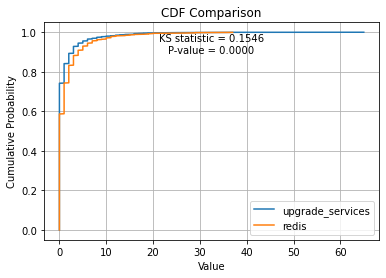

In [80]:
# Sort the samples
category1_sorted = np.sort(sample1_d)
category2_sorted = np.sort(sample2_d)


# Create the cumulative distribution function (CDF) for each sample
cdf_category1 = np.arange(len(category1_sorted)) / float(len(category1_sorted))
cdf_category2 = np.arange(len(category2_sorted)) / float(len(category2_sorted))

# Plot the CDFs
plt.plot(category1_sorted, cdf_category1, label='upgrade_services')
plt.plot(category2_sorted, cdf_category2, label='redis')

plt.text(0.5, 0.9, f'KS statistic = {ks_statistic:.4f}\nP-value = {p_value:.4f}',
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.title('CDF Comparison')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

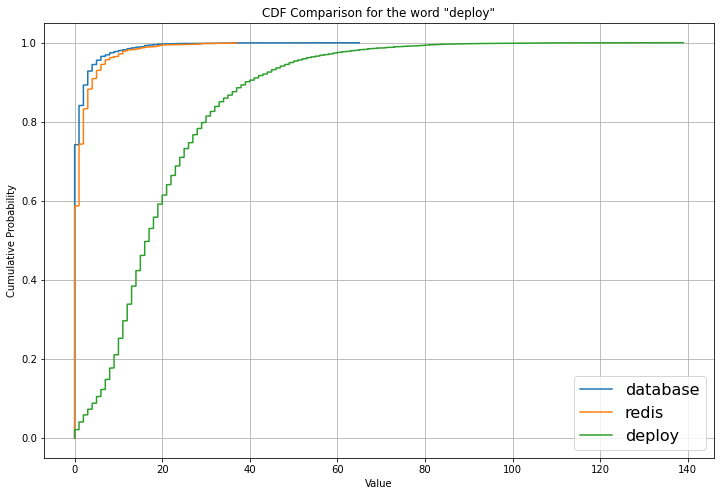

In [81]:
# Sort the samples
category1_sorted = np.sort(sample1_d)
category2_sorted = np.sort(sample2_d)
category3_sorted = np.sort(sample3)

# Create the cumulative distribution function (CDF) for each sample
cdf_category1 = np.arange(len(category1_sorted)) / float(len(category1_sorted))
cdf_category2 = np.arange(len(category2_sorted)) / float(len(category2_sorted))
cdf_category3 = np.arange(len(category3_sorted)) / float(len(category3_sorted))

# Set figure size
plt.figure(figsize=(12, 8))  # Adjust width and height as needed

# Plot the CDFs
plt.plot(category1_sorted, cdf_category1, label='database')
plt.plot(category2_sorted, cdf_category2, label='redis')
plt.plot(category3_sorted, cdf_category3, label='deploy')
# plt.text(0.5, 0.9, f'KS statistic = {ks_statistic1:.4f}\nP-value = {p_value1:.4f}',
#          horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.title('CDF Comparison for the word "deploy"')
plt.legend(prop={'size': 16})


# Show the plot
plt.grid(True)
plt.show()

In [91]:
# Get unique values in the 'input_type' column
unique_input_types = result_df['input_type'].unique()

# Initialize a list to store the occurrence of p-value=1 for each word
score_list = []

# Iterate through each word
for word_df in df_words:

    # Initialize matrices 
    ks_matrix = np.zeros((len(unique_input_types), len(unique_input_types)))
    p_value_matrix = np.zeros((len(unique_input_types), len(unique_input_types)))

    # Iterate over unique input types
    for i in range(len(unique_input_types)):
        for j in range(len(unique_input_types)):
            # Get samples for the current combination of input types
            sample1 = result_df.loc[result_df['input_type'] == unique_input_types[i], word_df].values
            sample2 = result_df.loc[result_df['input_type'] == unique_input_types[j], word_df].values

            # Perform the KS two-sample test
            ks_statistic, p_value = stats.ks_2samp(sample1, sample2)

            # Assign KS statistic and p-value to the corresponding indices in the matrices
            ks_matrix[i, j] = ks_statistic
            
            # Modify p-value as per the condition
            if p_value < 0.1:
                p_value = 1
            else:
                p_value = 0
            p_value_matrix[i, j] = p_value

    # Count the occurrences of 1 in the modified p-value matrix
    score = np.count_nonzero(p_value_matrix == 1) / (len(unique_input_types)**2)
    score_list.append(score)

# Convert occurrence list to a DataFrame for visualization
occurrence_df = pd.DataFrame({'Word': df_words, 'Score': score_list})


# Set the file path where you want to save the CSV file
file_path = 'fvscores.csv'

# Save the DataFrame to a CSV file
occurrence_df.to_csv(file_path, index=False)

In [92]:
# Using Bonferroni Correction
# Get unique values in the 'input_type' column
unique_input_types = result_df['input_type'].unique()

# Initialize a list to store the occurrence of significant results for each word
occurrence_list = []

# Initialize the number of comparisons made
num_comparisons = 36

# Iterate through each word
for word_df in df_words:

    # Initialize matrices 
    ks_matrix = np.zeros((len(unique_input_types), len(unique_input_types)))
    p_value_matrix = np.zeros((len(unique_input_types), len(unique_input_types)))

    # Iterate over unique input types
    for i in range(len(unique_input_types)):
        for j in range(len(unique_input_types)):
            # Get samples for the current combination of input types
            sample1 = result_df.loc[result_df['input_type'] == unique_input_types[i], word_df].values
            sample2 = result_df.loc[result_df['input_type'] == unique_input_types[j], word_df].values

            # Perform the KS two-sample test
            ks_statistic, p_value = stats.ks_2samp(sample1, sample2)

            # Assign KS statistic and p-value to the corresponding indices in the matrices
            ks_matrix[i, j] = ks_statistic
            
            # Adjust p-value using Bonferroni correction
            p_value_bonferroni = p_value * num_comparisons
            
            # Modify p-value as per the condition
            if p_value_bonferroni < 0.1:
                p_value_bonferroni = 1
            else:
                p_value_bonferroni = 0
            p_value_matrix[i, j] = p_value_bonferroni
            
            p_value_matrix[i, j] = p_value_bonferroni

    # Count the occurrences of significant results after Bonferroni correction
    score = np.count_nonzero(p_value_matrix == 1) / (len(unique_input_types)**2)
    occurrence_list.append(score)

# Convert occurrence list to a DataFrame for visualization
score_df = pd.DataFrame({'Word': df_words, 'Score': occurrence_list})
# Save the DataFrame to a CSV file
score_df.to_csv('fvbon_score.csv', index=False)